In [667]:
#importing important libraries and loading our data with pandas.

In [732]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [733]:
credit = pd.read_csv('CC GENERAL.csv')

In [734]:
#looking for general info.

In [735]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [736]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [737]:
#we have some null values in minimum_payments and credit limit.

In [738]:
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [739]:
credit['MINIMUM_PAYMENTS']

0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

In [740]:
#for minimum payments our most correlation occurs with the balance column.
#the customers balance and minimum payments are 0.39 correlated. 

In [741]:
credit.corr()['MINIMUM_PAYMENTS'].sort_values(ascending=False)

MINIMUM_PAYMENTS                    1.000000
BALANCE                             0.398684
CASH_ADVANCE                        0.140107
BALANCE_FREQUENCY                   0.132569
INSTALLMENTS_PURCHASES              0.132172
CREDIT_LIMIT                        0.126671
PAYMENTS                            0.126651
CASH_ADVANCE_TRX                    0.109739
CASH_ADVANCE_FREQUENCY              0.098838
PURCHASES_TRX                       0.096333
PURCHASES                           0.093860
TENURE                              0.059444
ONEOFF_PURCHASES                    0.048755
PURCHASES_INSTALLMENTS_FREQUENCY    0.030073
PURCHASES_FREQUENCY                 0.003030
ONEOFF_PURCHASES_FREQUENCY         -0.030327
PRC_FULL_PAYMENT                   -0.140379
Name: MINIMUM_PAYMENTS, dtype: float64

In [742]:
#when we look at the balances where minimum payments are NaN,we can see observe different variaties of balance.

<AxesSubplot:>

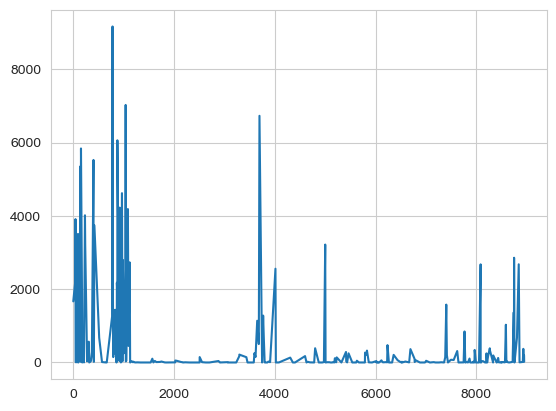

In [743]:
credit[credit['MINIMUM_PAYMENTS'].isnull()]['BALANCE'].plot()

In [744]:
#we need to deal with these empty data in minimum payments.
#since our data is correlated with balance, instead of taking total mean of minimum payments, 
#we are grouping our dataframe by balance and looking the mean of minimum payments per balance amount.

In [745]:
credit.groupby('BALANCE').mean()['MINIMUM_PAYMENTS']

BALANCE
0.000000           32.339388
0.000199            0.055880
0.001146           13.809153
0.001214            0.117036
0.001289            0.019163
                    ...     
16115.596400     5743.736444
16259.448570     5137.504664
16304.889250     8345.641905
18495.558550     4227.081580
19043.138560    18621.013310
Name: MINIMUM_PAYMENTS, Length: 8871, dtype: float64

In [746]:
#writing a function to change null values with the mean values per balance amount.

In [747]:
total_minpay_avg = credit.groupby('BALANCE').mean()['MINIMUM_PAYMENTS']

In [748]:
def fill_min_pay(BALANCE,MINIMUM_PAYMENTS):
    
    if np.isnan(MINIMUM_PAYMENTS):
        return total_minpay_avg[BALANCE]
    else:
        return MINIMUM_PAYMENTS

In [749]:
credit['MINIMUM_PAYMENTS'] = credit.apply(lambda x: fill_min_pay(x['BALANCE'], x['MINIMUM_PAYMENTS']), axis=1)

In [750]:
#we have still 239 empty rows. This is because of the unique balance amounts 
#which does not have any value that bearing a minimum payment amount.

In [751]:
credit['MINIMUM_PAYMENTS'].isnull().sum()

239

In [752]:
#density of the minimum payments

<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

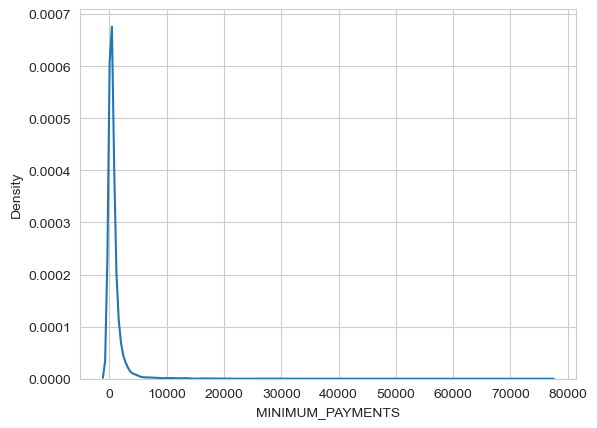

In [753]:
sns.kdeplot(data=credit, x='MINIMUM_PAYMENTS', )

<AxesSubplot:xlabel='MINIMUM_PAYMENTS'>

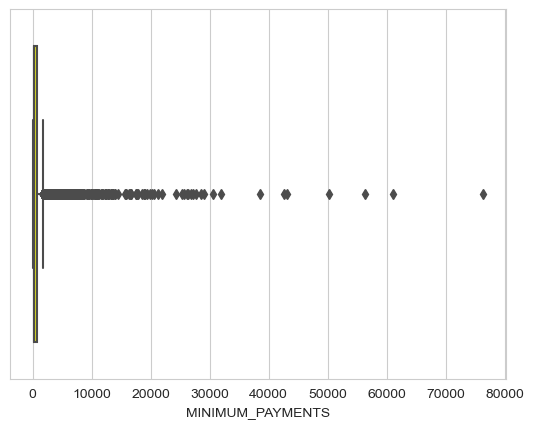

In [754]:
sns.boxplot(data=credit, x='MINIMUM_PAYMENTS', color='yellow')

In [755]:
#we have total 8711 minimum payments, however most of the minimum payments values are between 0 and 3000. 
#That's why we are taking the mean of minimum payments between 0 and 3000.

In [756]:
credit['MINIMUM_PAYMENTS'].count()

8711

In [757]:
credit[credit['MINIMUM_PAYMENTS'] < 3000 ]['MINIMUM_PAYMENTS'].count()

8342

In [758]:
credit[credit['MINIMUM_PAYMENTS'] < 3000]['MINIMUM_PAYMENTS'].mean()

543.4128934820162

In [759]:
#we are replacing NaN values with the mean.

In [760]:
credit['MINIMUM_PAYMENTS'] = credit['MINIMUM_PAYMENTS'].fillna(543.41)

In [761]:
credit.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [762]:
#dropping the only null value in the credit limit.

In [763]:
credit = credit.dropna()

In [764]:
#Some plots that give us info about customer's balance, credit limit and purchases etc.

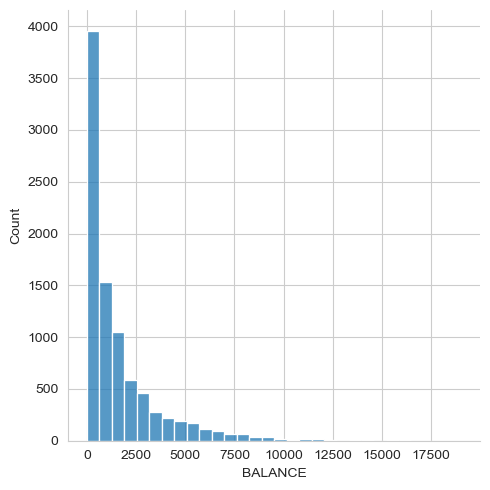

In [765]:
sns.set_style('whitegrid')
sns.displot(data=credit, x='BALANCE', bins=30)

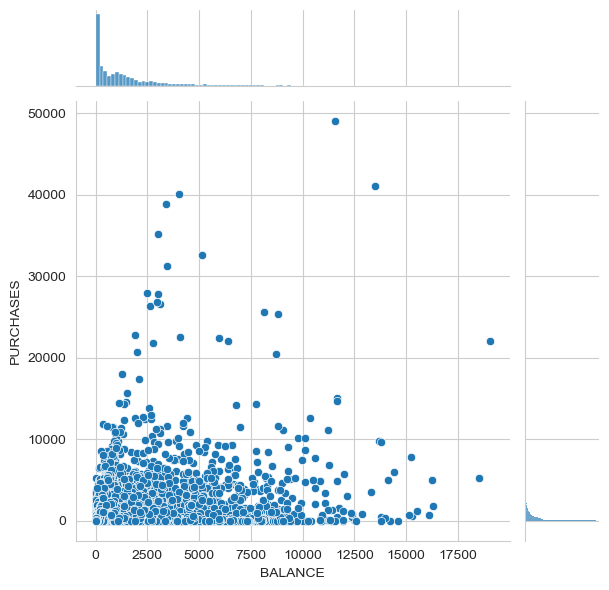

In [766]:
sns.jointplot(data=credit, x='BALANCE', y='PURCHASES')

In [767]:
credit.nunique()

CUST_ID                             8949
BALANCE                             8870
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4322
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8710
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

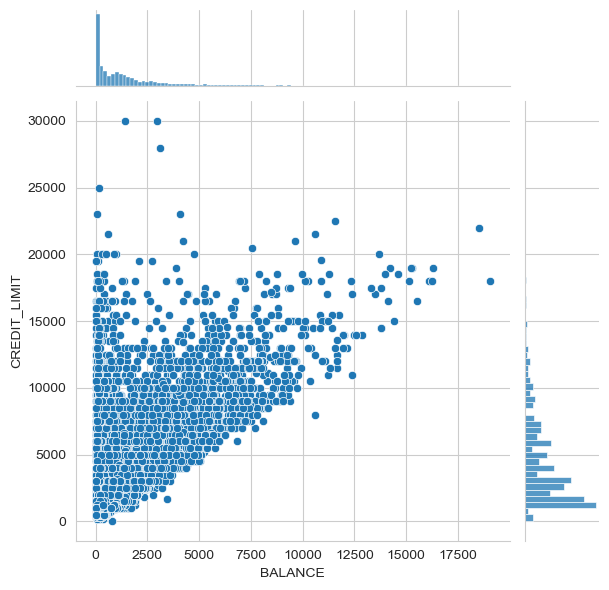

In [768]:
sns.jointplot(data=credit, x='BALANCE', y='CREDIT_LIMIT')

In [769]:
#We are dropping our only object column.


In [770]:
credit = credit.drop('CUST_ID', axis=1)

In [771]:
# Applying scaling

In [772]:
from sklearn.preprocessing import StandardScaler

In [773]:
scale =StandardScaler()

In [774]:
scaled_credit = scale.fit_transform(credit)

In [775]:
#Applying Principal Component Analysis

In [776]:
from sklearn.decomposition import PCA

In [777]:
pca = PCA(n_components=2)

In [778]:
pca.fit(scaled_credit)

PCA(n_components=2)

In [779]:
x_pca = pca.transform(scaled_credit)

In [780]:
x_pca.shape

(8949, 2)

In [781]:
#Choosing the optimal amount of the clusters. 

In [782]:
from sklearn.cluster import KMeans

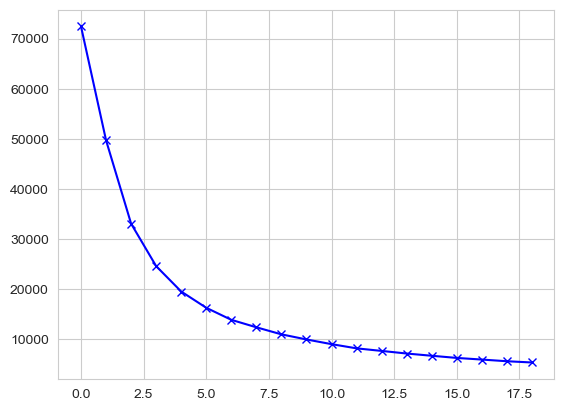

In [783]:
n_clusters=20
loss=[]
for i in range(1,n_clusters):
    KM= KMeans(i)
    KM.fit(x_pca)
    loss.append(KM.inertia_)
    
plt.plot(loss,'bx-')

In [784]:
KM = KMeans(n_clusters=4)

In [785]:
KM.fit(x_pca)

KMeans(n_clusters=4)

In [786]:
KM.cluster_centers_

array([[-1.3628356 , -0.19814928],
       [-0.53182711,  3.41984379],
       [ 6.00720528,  0.68345872],
       [ 0.91474559, -1.1668797 ]])

In [787]:
#Plotting our clusters.

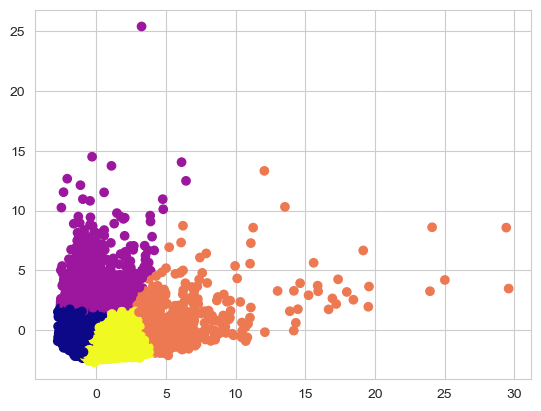

In [788]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=KM.labels_, cmap='plasma')

In [789]:
#For performance measurements, calculating the Silhouette score. 

In [790]:
from sklearn.metrics import silhouette_score

In [791]:
score = silhouette_score(x_pca, KM.labels_)
print('Silhouette score: ', score)

Silhouette score:  0.40733087938573015


In [792]:
#Our cluster division. The total data distribution in our each cluster.

In [793]:
counts = pd.Series(KM.labels_).value_counts()
print(counts)

0    3918
3    3283
1    1246
2     502
dtype: int64


In [794]:
#Bar plot 

<AxesSubplot:>

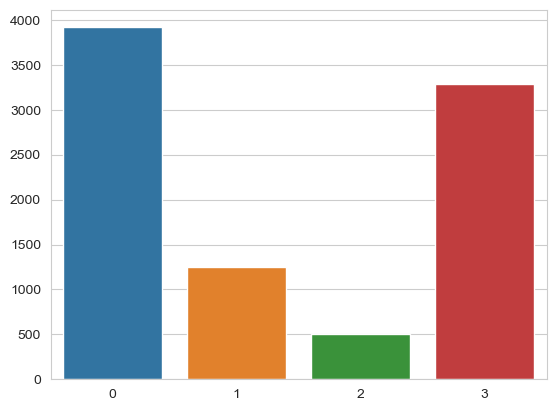

In [795]:
sns.barplot(x=counts.index, y=counts.values)

In [ ]:
#Because that, it is an unsupervised algorithm, the observations are subjective.
#Cluster 1 and Cluster 2 could be more niche group.